In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import data

In [2]:
df = pd.read_csv('medical_examination.csv')

### Add 'overweight' column

In [3]:
# Add an "overweight" column based on BMI calculation
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2)) > 25).astype(int)

# Display the head of updated DataFrame
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Normalize data by making 0 always good and 1 always bad. 

In [4]:
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df[['cholesterol', 'gluc']]

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
69995,0,0
69996,1,1
69997,1,0
69998,0,1


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). 

The dataset should be split by 'Cardio' so there is one chart for each cardio value. 

The chart should look like examples/Figure_1.png.

In [5]:
df.iloc[:, 0:14]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [6]:
df_cat = df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']]
df_cat.iloc[:, 0:6]

,cholesterol,gluc,smoke,alco,active,overweight
0,0,0,0,0,1,0
1,1,0,0,0,1,1
2,1,0,0,0,0,0
3,0,0,0,0,1,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
69995,0,0,1,0,1,1
69996,1,1,0,0,1,1
69997,1,0,0,1,0,1
69998,0,1,0,0,0,1


In [7]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


# Todo
Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot().   
The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [17]:
df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [23]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


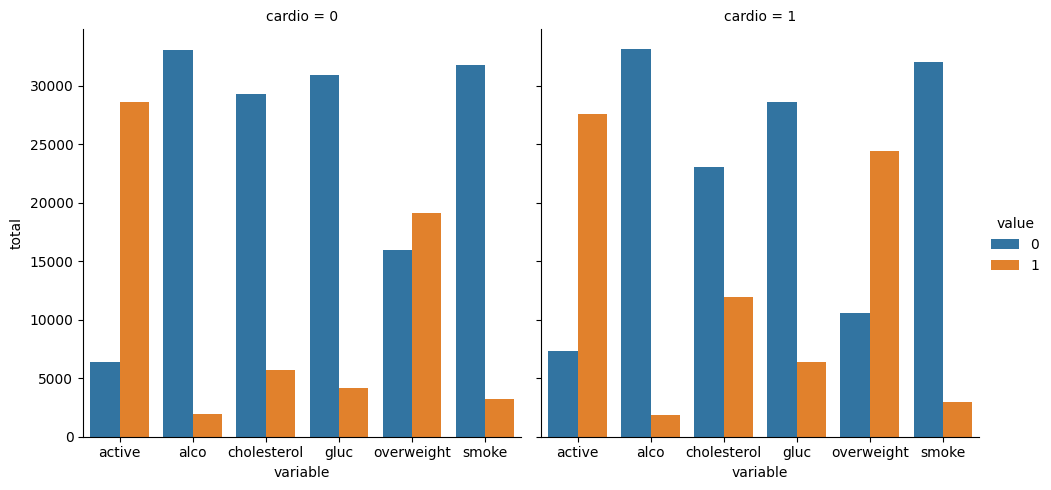

In [24]:
sns.catplot(x='variable', y='total', hue='value', data=df_cat, kind='bar', col='cardio')

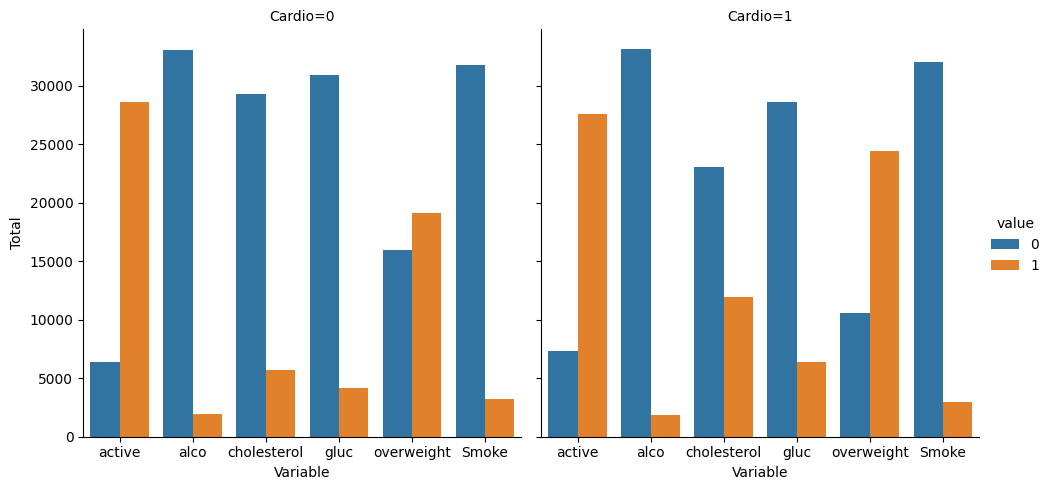

In [29]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # Rename one of the columns for the catplot to work correctly
    df_cat['variable'] = df_cat['variable'].map({
        'cholesterol': 'cholesterol',
        'gluc': 'gluc',
        'smoke': 'Smoke',
        'alco': 'alco',
        'active': 'active',
        'overweight': 'overweight'
    })

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x='variable', y='total', hue='value', data=df_cat, kind='bar', col='cardio')
    
    # Customize the plot
    g.set_axis_labels("Variable", "Total")
    g.set_titles("Cardio={col_name}")
    
    # Get the figure for the output
    fig = g.fig
    
    # Save the figure
    # fig.savefig('catplot.png')
    
    return fig

# Call the function to generate the plot
fig = draw_cat_plot()


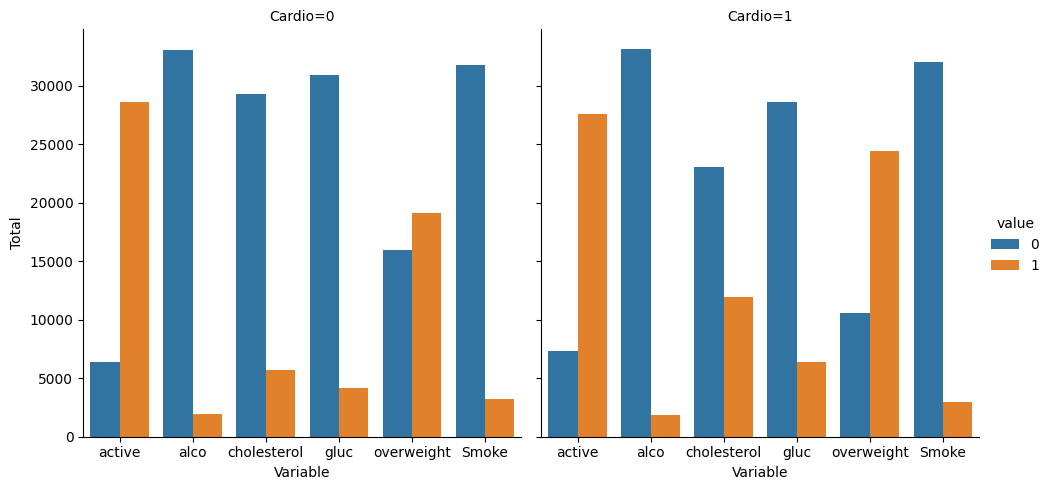

In [30]:
fig

# Todo
## Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

## Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap().   
## Mask the upper triangle. The chart should look like examples/Figure_2.png.

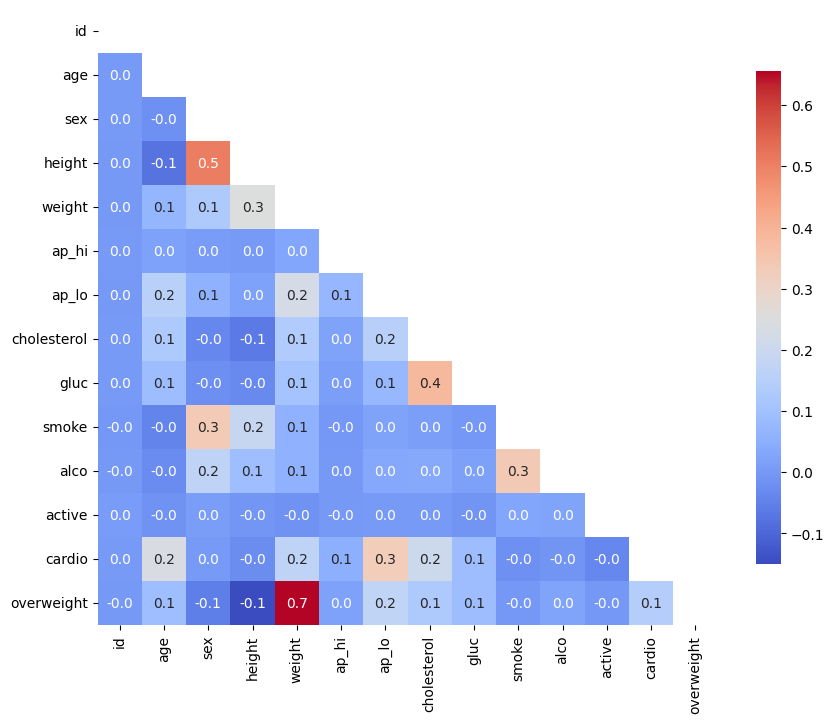

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the data loaded in a DataFrame df

def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(corr)
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={"shrink": 0.8})
    
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

fig2 = draw_heat_map()